In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

In [1]:
Nx, Ny, Nz = 64, 1, 64
et = 1
N = 1

def load(Nx,Ny,Nz,et):
    N = 1
    base_fn = 'output_bal_swe'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

NameError: name 'utils' is not defined

1.0


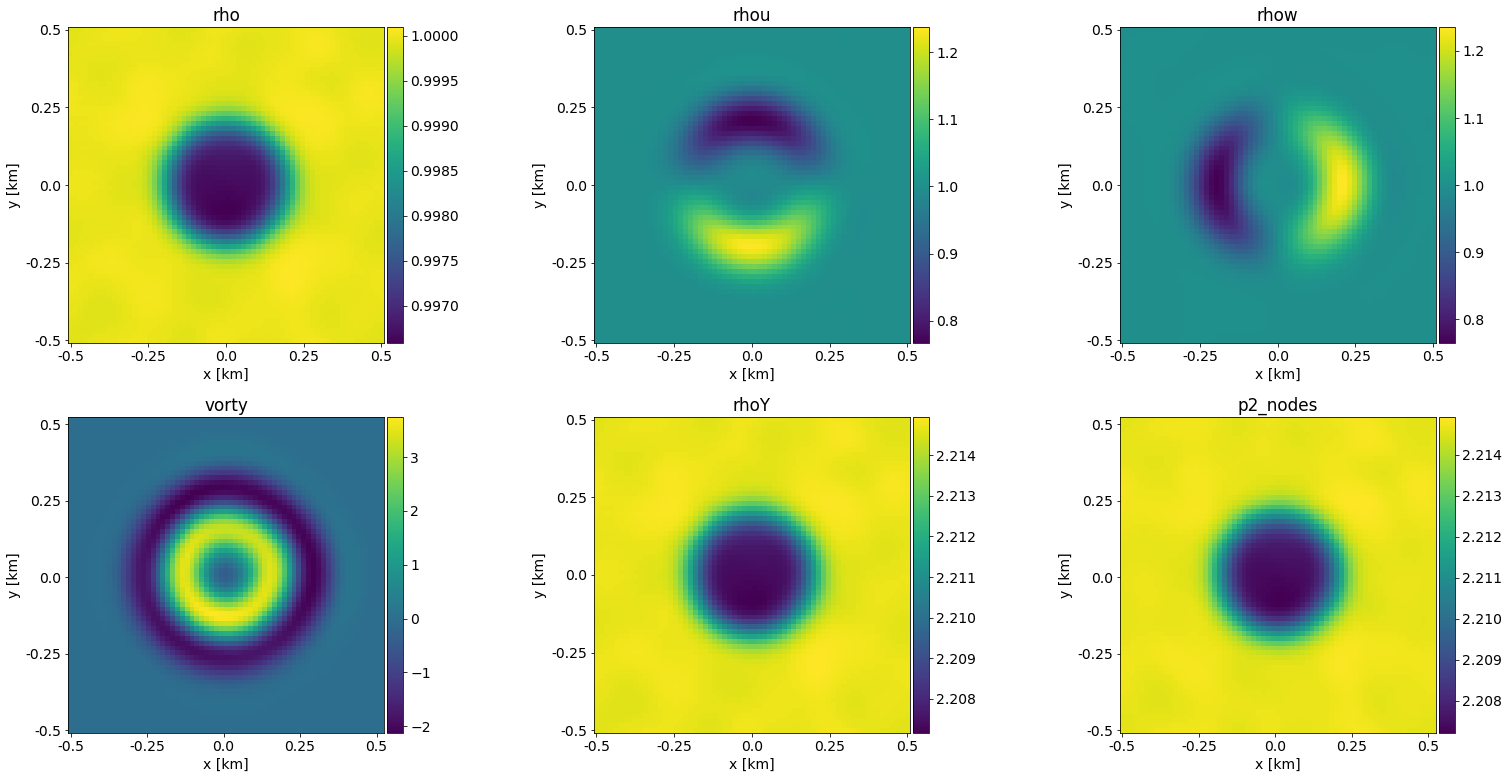

In [39]:
comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']

t_lbl = 'TIME'
slc = 0

times = [1.0]
tag = tags[9]

arr_lst = []

for tt,time in enumerate(times):
    print(time)
    for atr_idx, attribute in enumerate(attributes):
        
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0][:,slc,:]
        arr = arr.T
        
        arr_lst.append([arr,attribute])
        
        arr = [arr,attribute]

pl = pt.plotter(arr_lst,ncols=3,figsize=(22,12),sharey=False)
# lvls = np.arange(-0.45,1.7,0.1)
lvls = np.arange(-11.0,11.1,2)
# lvls = np.arange(H-60,H+42,2)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='imshow')